In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel

In [4]:
train = pd.read_csv('/content/drive/My Drive/PGPDSE/Hackathon/Training Data Set.csv')
train.shape

(53515, 17)

In [5]:
test = pd.read_csv('/content/drive/My Drive/PGPDSE/Hackathon/Test Data Set.csv')
test.shape

(5615, 16)

In [6]:
df = pd.concat([train, test])
df.shape

(59130, 17)

In [7]:
df = df.reset_index(drop = True)
df

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59125,16611,skoda,octavia,Mumbai,149976.0,First,2011,8,1968,103.0,NaN,8,man,4,5,diesel,NaN
59126,16612,skoda,superb,Ahmedabad,332000.0,First,2005,14,1896,96.0,NaN,6,man,4,5,diesel,NaN
59127,16613,skoda,octavia,Bangalore,230800.0,Second,2005,14,1896,77.0,NaN,7,man,5,5,diesel,NaN
59128,16614,nissan,qashqai,Jaipur,63480.0,Third,2011,8,1997,104.0,NaN,5,man,4,7,petrol,NaN


In [8]:
id = df['Id']

In [9]:
df.drop('Id', 1, inplace = True)

In [10]:
df['Distance'] = df['Distance ']
df.drop('Distance ', 1, inplace = True)

In [11]:
df.isna().sum() / df.shape[0]

Maker                  0.000000
model                  0.000000
Location               0.000000
Owner Type             0.000000
manufacture_year       0.000000
Age of car             0.000000
engine_displacement    0.000000
engine_power           0.027177
body_type              0.922916
Vroom Audit Rating     0.000000
transmission           0.000000
door_count             0.000000
seat_count             0.000000
fuel_type              0.000000
Price                  0.094960
Distance               0.022645
dtype: float64

In [12]:
df.drop('body_type', 1, inplace = True)

In [13]:
df['Distance'].fillna(df['Distance'].median(), inplace = True)

In [14]:
df['engine_power'].fillna(df['engine_power'].median(), inplace = True)

In [15]:
df['door_count'].value_counts()

4       37391
5        8405
None     8340
2        4779
3         204
6           9
1           2
Name: door_count, dtype: int64

In [16]:
df['door_count'] = df['door_count'].replace({'None' : np.nan})
vc = df['door_count'].value_counts(normalize = True)
miss = df['door_count'].isna()
df.loc[miss, 'door_count'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)
df['door_count'] = df['door_count'].astype('int64')
df['door_count'].value_counts()

4    43488
5     9742
2     5637
3      250
6       10
1        3
Name: door_count, dtype: int64

In [17]:
 df['seat_count'].value_counts()

5       42924
None     9402
4        4922
7         934
2         804
3         117
6          23
9           2
1           1
8           1
Name: seat_count, dtype: int64

In [18]:
df['seat_count'] = df['seat_count'].replace({'None' : np.nan})
vc = df['seat_count'].value_counts(normalize = True)
miss = df['seat_count'].isna()
df.loc[miss, 'seat_count'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)
df['seat_count'] = df['seat_count'].astype('int64')
df['seat_count'].value_counts()

5    51006
4     5871
7     1122
2      956
3      143
6       26
9        3
8        2
1        1
Name: seat_count, dtype: int64

In [19]:
df.drop('manufacture_year', 1, inplace = True)

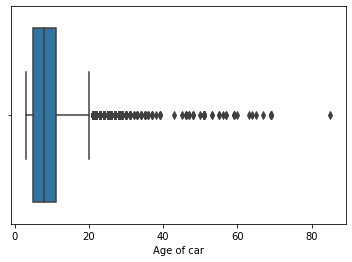

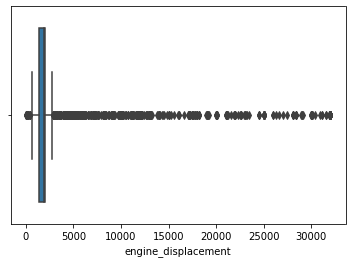

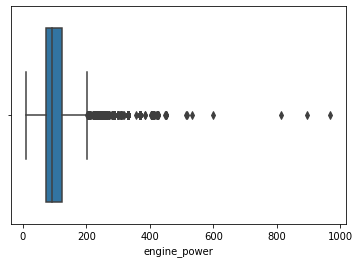

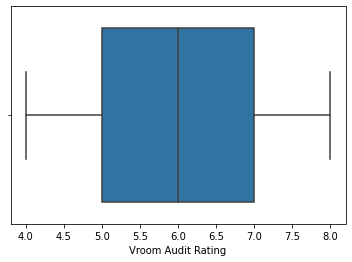

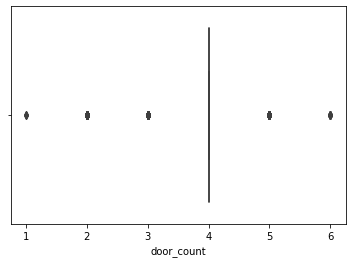

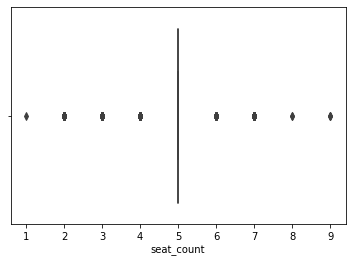

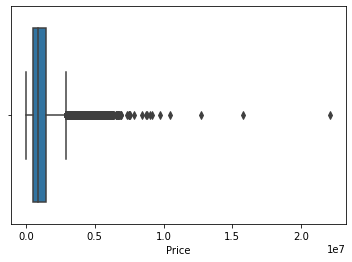

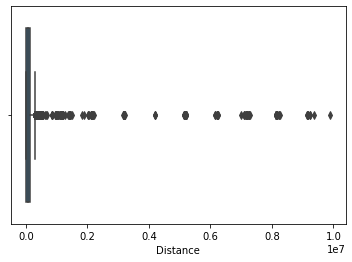

In [20]:
num = df.select_dtypes(exclude = 'O').columns
for i in num:
    sns.boxplot(df[i])
    plt.show()

In [21]:
df.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'transmission', 'door_count', 'seat_count', 'fuel_type', 'Price',
       'Distance'],
      dtype='object')

In [22]:
df.columns = ['maker', 'model', 'location', 'owner_type', 'age', 'engine_displacement',
       'engine_power', 'rating', 'transmission', 'door_count', 'seat_count', 'fuel_type',
       'price', 'distance']

In [23]:
df.head()

,maker,model,location,owner_type,age,engine_displacement,engine_power,rating,transmission,door_count,seat_count,fuel_type,price,distance
0,skoda,octavia,Ahmedabad,Second,55,1964,147.0,8,man,4,5,petrol,543764.25,65300.0
1,fiat,panda,Ahmedabad,Third,7,1242,51.0,6,man,4,4,petrol,401819.25,27750.0
2,bmw,x1,Hyderabad,Third,5,1995,105.0,7,auto,4,5,diesel,2392855.50,46000.0
3,nissan,juke,Mumbai,Third,8,1618,140.0,7,man,4,5,petrol,958606.50,43949.0
4,bmw,x5,Jaipur,Fourth & Above,7,2993,180.0,7,auto,4,5,diesel,3085561.50,59524.0


In [24]:
df.reset_index(drop = True, inplace = True)

In [25]:
df[df['price'].isnull()]

,maker,model,location,owner_type,age,engine_displacement,engine_power,rating,transmission,door_count,seat_count,fuel_type,price,distance
53515,skoda,octavia,Mumbai,First,12,1595,75.0,5,man,4,5,petrol,NaN,150000.0
53516,skoda,rapid,Coimbatore,Third,5,1598,77.0,4,man,4,5,diesel,NaN,29376.0
53517,skoda,octavia,Coimbatore,Second,5,1968,110.0,5,man,5,5,diesel,NaN,30563.0
53518,audi,q3,Delhi,Fourth & Above,4,1968,110.0,8,auto,4,5,diesel,NaN,8650.0
53519,audi,tt,Chennai,Third,4,1984,169.0,4,auto,2,5,petrol,NaN,6400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59125,skoda,octavia,Mumbai,First,8,1968,103.0,8,man,4,5,diesel,NaN,149976.0
59126,skoda,superb,Ahmedabad,First,14,1896,96.0,6,man,4,5,diesel,NaN,332000.0
59127,skoda,octavia,Bangalore,Second,14,1896,77.0,7,man,5,5,diesel,NaN,230800.0
59128,nissan,qashqai,Jaipur,Third,8,1997,104.0,5,man,4,7,petrol,NaN,63480.0


In [26]:
X = df.drop('price', 1)
y = df['price']
X_train = X[:53515]
y_train = y[:53515]
X_test = X[53515:]
y_test = y[53515:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53515, 13), (53515,), (5615, 13), (5615,))

In [27]:
num = ['age', 'engine_displacement',
       'engine_power', 'rating', 'door_count', 'seat_count', 'distance']

In [28]:
for i in num:
    print(X_train[i].skew(), X_test[i].skew())

1.9125557321371436 2.151668535955962
12.730459629497304 13.087955583034667
1.7912304691708218 2.719814064126615
0.0049910074172671666 0.005117383792680339
-1.3512161297036762 -1.369542235247763
-1.5749331866647478 -1.8746264590778843
23.6028344559942 21.340080923951337


In [29]:
tran = ['age', 'engine_displacement',
       'engine_power', 'door_count', 'seat_count', 'distance']

In [30]:
pt = PowerTransformer()
X_train[tran] = pt.fit_transform(X_train[tran])
X_test[tran] = pt.transform(X_test[tran])
for i in num:
    print(X_train[i].skew(), X_test[i].skew())

0.06116264135204408 0.11668922757025084
-0.5373946116887601 0.19327299999902287
0.0371132119835988 0.08618424627234243
0.0049910074172671666 0.005117383792680339
0.06669949858820155 0.07823892400641984
0.7847842968892992 0.4386496453364035
-0.18013216696249706 -0.0767746475452153


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [31]:
X_train.head()

,maker,model,location,owner_type,age,engine_displacement,engine_power,rating,transmission,door_count,seat_count,fuel_type,distance
0,skoda,octavia,Ahmedabad,Second,3.118585,0.393766,1.114821,8,man,-0.123481,0.155636,petrol,0.217529
1,fiat,panda,Ahmedabad,Third,-0.101184,-0.989274,-1.332384,6,man,-0.123481,-1.585828,petrol,-0.279840
2,bmw,x1,Hyderabad,Third,-0.827254,0.437810,0.284840,7,auto,-0.123481,0.155636,diesel,-0.000941
3,nissan,juke,Mumbai,Third,0.172800,-0.168405,0.991314,7,man,-0.123481,0.155636,petrol,-0.027803
4,bmw,x5,Jaipur,Fourth & Above,-0.101184,1.510520,1.639240,7,auto,-0.123481,0.155636,diesel,0.157628


In [32]:
obj = ['maker', 'model', 'location', 'owner_type', 'transmission', 'fuel_type']

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   maker                53515 non-null  object 
 1   model                53515 non-null  object 
 2   location             53515 non-null  object 
 3   owner_type           53515 non-null  object 
 4   age                  53515 non-null  float64
 5   engine_displacement  53515 non-null  float64
 6   engine_power         53515 non-null  float64
 7   rating               53515 non-null  int64  
 8   transmission         53515 non-null  object 
 9   door_count           53515 non-null  float64
 10  seat_count           53515 non-null  float64
 11  fuel_type            53515 non-null  object 
 12  distance             53515 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 5.3+ MB


In [34]:
for i in obj:
    le = LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])
X_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,maker,model,location,owner_type,age,engine_displacement,engine_power,rating,transmission,door_count,seat_count,fuel_type,distance
0,6,8,0,2,3.118585,0.393766,1.114821,8,1,-0.123481,0.155636,1,0.217529
1,2,9,0,3,-0.101184,-0.989274,-1.332384,6,1,-0.123481,-1.585828,1,-0.279840
2,1,18,5,3,-0.827254,0.437810,0.284840,7,0,-0.123481,0.155636,0,-0.000941
3,5,6,9,3,0.172800,-0.168405,0.991314,7,1,-0.123481,0.155636,1,-0.027803
4,1,20,6,1,-0.101184,1.510520,1.639240,7,0,-0.123481,0.155636,0,0.157628


In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   maker                53515 non-null  int64  
 1   model                53515 non-null  int64  
 2   location             53515 non-null  int64  
 3   owner_type           53515 non-null  int64  
 4   age                  53515 non-null  float64
 5   engine_displacement  53515 non-null  float64
 6   engine_power         53515 non-null  float64
 7   rating               53515 non-null  int64  
 8   transmission         53515 non-null  int64  
 9   door_count           53515 non-null  float64
 10  seat_count           53515 non-null  float64
 11  fuel_type            53515 non-null  int64  
 12  distance             53515 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 5.3 MB


In [36]:
rfr = RandomForestRegressor(random_state = 0)

In [37]:
rfr.fit(X_train, y_train)
y_train_pred = rfr.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_train_pred)), r2_score(y_train, y_train_pred)

(88444.69832677238, 0.9890224416059095)

In [38]:
sorted(zip(rfr.feature_importances_, X_train.columns))

[(0.0016656857417940245, 'seat_count'),
 (0.002071085524901595, 'door_count'),
 (0.004221164913510812, 'fuel_type'),
 (0.004897571126332381, 'owner_type'),
 (0.0050769351299483545, 'rating'),
 (0.006732782575340198, 'transmission'),
 (0.00783703020839013, 'location'),
 (0.019564111025699226, 'model'),
 (0.02735206494526001, 'engine_displacement'),
 (0.05945772962101549, 'distance'),
 (0.1494749676730904, 'engine_power'),
 (0.31641471151470124, 'age'),
 (0.39523416000001604, 'maker')]

In [39]:
lgbmr = lgb.LGBMRegressor(random_state = 0)
lgbmr.fit(X_train, y_train)
lgbmr.score(X_train, y_train)

0.9367290165693514

In [40]:
lgbmr = lgb.LGBMRegressor(random_state = 0)

params = {'n_estimators' : sp_randint(200, 300),
         'max_depth' : sp_randint(1, 15),
         'learning_rate' : sp_uniform(0, 0.5)}

rsearch_lgbm = RandomizedSearchCV(lgbmr, param_distributions = params,
                                 cv = 5, n_iter = 100, n_jobs = -1, random_state = 0)

rsearch_lgbm.fit(X_train, y_train)
print(rsearch_lgbm.best_params_)

{'learning_rate': 0.07948479182275986, 'max_depth': 14, 'n_estimators': 285}


In [41]:
lgbmr = lgb.LGBMRegressor(**rsearch_lgbm.best_params_, random_state = 0)
lgbmr.fit(X_train, y_train)
lgbmr.score(X_train, y_train)

0.9444476505626853

In [42]:
sub = pd.read_csv('/content/drive/My Drive/PGPDSE/Hackathon/Sample Submission-1.csv')
sub['Price'] = lgbmr.predict(X_test)
sub.to_csv('submit7_Tran_LE_LGBtuned_All.csv', index = False)

In [43]:
sfm = SelectFromModel(rfr, threshold = 0.003)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False, random_state=0,
                                                verbose=0, warm_start=False),
                max_features=None, 

In [44]:
feat_labels = list(X_train.columns)

In [45]:
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

maker
model
location
owner_type
age
engine_displacement
engine_power
rating
transmission
fuel_type
distance


In [46]:
X_imp_train = sfm.transform(X_train)
X_imp_test = sfm.transform(X_test)

In [47]:
lgbmr = lgb.LGBMRegressor(random_state = 0)
lgbmr.fit(X_imp_train, y_train)
lgbmr.score(X_imp_train, y_train)

0.9356896651314734

In [48]:
lgbmr = lgb.LGBMRegressor(random_state = 0)

params = {'n_estimators' : sp_randint(400, 500),
         'max_depth' : sp_randint(1, 20),
         'learning_rate' : sp_uniform(0, 0.5)}

rsearch_lgbm = RandomizedSearchCV(lgbmr, param_distributions = params,
                                 cv = 3, n_iter = 25, n_jobs = -1, random_state = 0)

rsearch_lgbm.fit(X_imp_train, y_train)
print(rsearch_lgbm.best_params_)

{'learning_rate': 0.21930075673116017, 'max_depth': 5, 'n_estimators': 406}


In [49]:
lgbmr = lgb.LGBMRegressor(**rsearch_lgbm.best_params_, random_state = 0)
lgbmr.fit(X_imp_train, y_train)
lgbmr.score(X_imp_train, y_train)

0.9485157561638687

In [50]:
sub = pd.read_csv('/content/drive/My Drive/PGPDSE/Hackathon/Sample Submission-1.csv')
sub['Price'] = lgbmr.predict(X_imp_test)
sub.to_csv('submit8_Tran_LE_LGBtuned_FS.csv', index = False)